In [2]:
from keras.preprocessing.image import ImageDataGenerator

# create a new generator
imagegen = ImageDataGenerator()
# load train data
train = imagegen.flow_from_directory("F:/University/4thYear/1semester/research project/rose/dataset/training", class_mode="categorical", shuffle=False, batch_size=100, target_size=(224, 224))
# load val data
val = imagegen.flow_from_directory("F:/University/4thYear/1semester/research project/rose/dataset/validation", class_mode="categorical", shuffle=False, batch_size=100, target_size=(224, 224))

Found 888 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

# build a sequential model
model = Sequential()
model.add(InputLayer(input_shape=(224, 224, 3)))

# 1st conv block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())
# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# ANN block
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))
# output layer
model.add(Dense(units=3, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# fit on data for 30 epochs
history=model.fit_generator(train, epochs=10, validation_data=val)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
9/9 [==============================] - 473s 53s/step - loss: 1.6528 - accuracy: 0.3086 - val_loss: 3.3167 - val_accuracy: 0.3467
Epoch 2/10
9/9 [==============================] - 387s 43s/step - loss: 0.9811 - accuracy: 0.5676 - val_loss: 4.2943 - val_accuracy: 0.3600
Epoch 3/10
9/9 [==============================] - 479s 53s/step - loss: 0.7655 - accuracy: 0.6824 - val_loss: 1.0792 - val_accuracy: 0.5533
Epoch 4/10
9/9 [==============================] - 464s 52s/step - loss: 0.5788 - accuracy: 0.7658 - val_loss: 1.3585 - val_accuracy: 0.5667
Epoch 5/10
9/9 [==============================] - 454s 50s/step - loss: 0.4033 - accuracy: 0.8604 - val_loss: 1.1744 - val_accuracy: 0.5500
Epoch 6/10
9/9 [==============================] - 376s 42s/step - loss: 0.2584 - accuracy: 0.9189 - val_loss: 1.5652 - val_accuracy: 0.5267
Epoch 7/10
9/9 [==============================] - 379s 42s/step - loss: 0.1687 - acc

In [4]:
from keras.applications import VGG16

# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet')
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [5]:
from keras.utils import to_categorical
# extract train and val features
vgg_features_train = pretrained_model.predict(train)
vgg_features_val = pretrained_model.predict(val)

In [48]:
# OHE target column
train_target = to_categorical(train.labels)
val_target = to_categorical(val.labels)

In [2]:
model2 = Sequential()
model2.add(Flatten(input_shape=(7,7,512)))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax'))

# compile the model
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model2.summary()

# train model using features generated from VGG16 model
#model2.fit(vgg_features_train, train_target, epochs=50, batch_size=100, validation_data=(vgg_features_val, val_target))

NameError: name 'Sequential' is not defined

In [1]:
model2.fit(vgg_features_train, train_target, epochs=30, batch_size=100, validation_data=(vgg_features_val, val_target))

NameError: name 'model2' is not defined

In [4]:
## Now predict
from os import listdir
from os.path import isfile, join

predict_dir_path = 'F:/University/4thYear/1semester/research project/rose/dataset/test'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['IMG-20210103-WA0108.jpg', 'IMG-20210103-WA0109.jpg', 'IMG_20210102_103614.jpg', 'IMG_20210102_103743.jpg', 'IMG_20210102_104242.jpg', 'IMG_4127.jpeg', 'IMG_4131.jpeg']


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


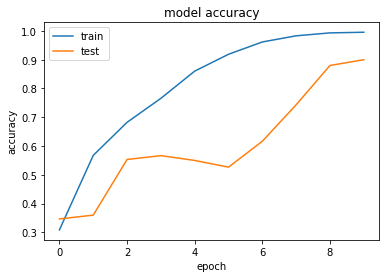

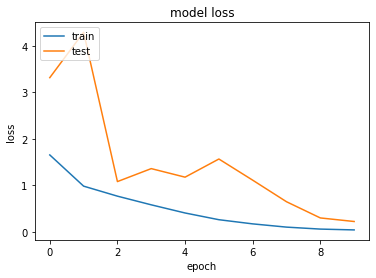

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

#list all data in history
print(history.history.keys())
# summarize hostory for accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
#summerize history for lost
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss ')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [6]:
from keras.preprocessing import image
import numpy as np
anthracnose = 0
Blacksopt = 0
Graymold = 0
other_counter = 0

for file in onlyfiles:
    img = image.load_img(predict_dir_path+'/'+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=100)
    classes = classes[0]
    
    if classes == 0:
        print(file + ":" + 'Blacksopt')
        anthracnose += 1
    elif classes == 1:
        print(file + ":" + "Graymold")
        Blacksopt += 1
    elif classes == 2:
        print(file + ":" + "anthracnose")
        Graymold += 1
    else:
        print(file + ":" + "other")
        other_counter += 1
        

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
IMG-20210103-WA0108.jpg:Graymold
IMG-20210103-WA0109.jpg:Graymold
IMG_20210102_103614.jpg:anthracnose
IMG_20210102_103743.jpg:Blacksopt
IMG_20210102_104242.jpg:anthracnose
IMG_4127.jpeg:Blacksopt
IMG_4131.jpeg:Blacksopt
